#**Task 2: Conditional expectation for missing value prediction**





In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.mlab import bivariate_normal
import scipy.stats as linregress
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import interpolate
from scipy.stats import linregress

In [0]:
def calc_Expectation(height, weight, mu):
        x = np.array(height - mu[0])
        y = np.array(weight - mu[1])
        x_pow = x ** 2
        y_pow = y ** 2
        sum = - (((x_pow / var1) + (y_pow / var2) - ((2 * p * x * y)/ (d1 * d2)))) / (2 * (1 - (p ** 2)))
        exp = np.exp(sum)
        return (exp / (2 * np.pi * d1 * d2 * np.sqrt(1 - (p ** 2))))

In [0]:
if __name__ == "__main__":

    # Read data as 2D array of data type 'object'
    data = np.loadtxt('whData.dat', dtype=np.object, comments='#', delimiter=None)

    # Read height and weight data into 2D array (i.e. into a matrix)
    X = data[:, 0:2].astype(np.float)

    missing_values =  X[X[:, 0] < 0, :]
    missing_values = missing_values[:,1]
    
    # Removing the outliers
    X = X[X[:, 0] > 0, :]

    X = X[np.argsort(X[:, 1])]
    height = X[:, 1]
    weight = X[:, 0]
    
    mean1 = np.mean(height)
    mean2 = np.mean(weight)
    d1 = np.std(height)
    d2 = np.std(weight)
    p = np.cov(height,weight)[0][1] / (d1 * d2)

    var1 = np.var(height)
    var2 = np.var(weight)
    sigma = np.array([[var1,p*d1*d2],[p*d1*d2,var2]])
    inv = np.linalg.inv(sigma)
    mu = np.array([mean1, mean2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  import sys


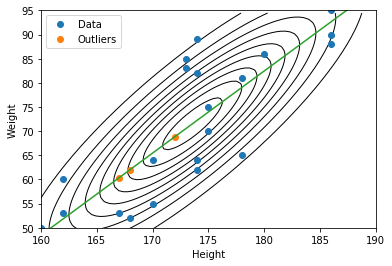

Outliers -  [168. 172. 167.] 
Predicted Weight Values -  [62.05816344 68.85401191 60.35920132]


In [54]:
temp = p * d1 * d2

plt.plot(height, weight, 'o', label="Data")
x = np.random.uniform(150, 200, 100000)
y = np.random.uniform(40, 95, 100000)
z = calc_Expectation(x, y, mu)
Z = bivariate_normal(x, y, d1, d2, mu[0], mu[1], temp)
xi = np.linspace(150, 190, 100)
yi = np.linspace(40, 110, 100)

# Grid
zi = griddata((x, y), Z, (xi[None, :], yi[:, None]), method='cubic')

# Contour & plotting dots at data points
plt.contour(xi, yi, zi, 10, linewidths=1, colors='k')
plt.xlim(160, 190)
plt.ylim(50, 95)
plt.xlabel("Height")
plt.ylabel("Weight")

predicted_values = mean2 + (p * d2 * (missing_values[:] - mean1) )/ d1

plt.plot(missing_values, predicted_values, 'o', label="Outliers")
slope, intercept, r_value, p_value, std_err = linregress(missing_values, predicted_values)
x = np.linspace(150,230,900)
plt.plot(x,intercept+(slope*x))
plt.legend()
plt.show()

print("Outliers - ", missing_values,"\nPredicted Weight Values - ",predicted_values)
